In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input

IMAGE_SIZE = 64
BATCH_SIZE = 64

# ImageDataGenerator 객체를 생성하여 이미지 정규화(rescale)
idg = ImageDataGenerator(preprocessing_function=preprocess_input)

# 데이터 디렉토리 경로 설정하기
original_dir = './datasets/face/original/'
test_dir = './datasets/face/test/'

# 이미지 읽어오기
original_generator = idg.flow_from_directory(original_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='categorical', 
                                             shuffle=True)

test_generator = idg.flow_from_directory(test_dir, 
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE, 
                                             class_mode='categorical')

# 각 클래스 인덱스 출력하기
print(original_generator.class_indices)
print(test_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 8060 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [2]:
# {인덱스 번호 : 클래스 이름} 형태로 변환하여 딕셔너리로 만들어 target_name에 저장하기
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [3]:
# 리스트 생성하기
original_target_names = []
test_target_names = []

# 인덱스에 해당하는 클래스 이름을 생성한 리스트에 담아주는 반복문
for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])

# 출력하기
print(original_target_names.__len__(), test_target_names.__len__())

28709 8060


In [4]:
import pandas as pd

# 데이터 프레임 생성하기
original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

# 파일 경로에서 \\를 /로 변환하기
test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)
display(test_df)

,file_paths,target_names,targets
0,./datasets/face/original/angry/angry1.png,angry,0
1,./datasets/face/original/angry/angry10.png,angry,0
2,./datasets/face/original/angry/angry100.png,angry,0
3,./datasets/face/original/angry/angry1000.png,angry,0
4,./datasets/face/original/angry/angry1001.png,angry,0
...,...,...,...
28704,./datasets/face/original/surprise/surprise995.png,surprise,6
28705,./datasets/face/original/surprise/surprise996.png,surprise,6
28706,./datasets/face/original/surprise/surprise997.png,surprise,6
28707,./datasets/face/original/surprise/surprise998.png,surprise,6


,file_paths,target_names,targets
0,./datasets/face/test/angry/PrivateTest_1013136...,angry,0
1,./datasets/face/test/angry/PrivateTest_1030447...,angry,0
2,./datasets/face/test/angry/PrivateTest_1054527...,angry,0
3,./datasets/face/test/angry/PrivateTest_1059009...,angry,0
4,./datasets/face/test/angry/PrivateTest_1109992...,angry,0
...,...,...,...
8055,./datasets/face/test/surprise/surprise95.png,surprise,6
8056,./datasets/face/test/surprise/surprise96.png,surprise,6
8057,./datasets/face/test/surprise/surprise97.png,surprise,6
8058,./datasets/face/test/surprise/surprise98.png,surprise,6


In [5]:
from sklearn.model_selection import train_test_split

# 오리지널 데이터 프레임을 train과 validation으로 나눠주기
train_images, validation_images, train_targets, validation_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, 
                 random_state=124)

# 원래 데이터 프레임에서 각 해당하는 행을 선택하여 데이터프레임을 생성하고 인덱스 초기화
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

display(train_df)
display(validation_df)

,file_paths,target_names,targets
0,./datasets/face/original/sad/sad4254.png,sad,5
1,./datasets/face/original/sad/sad4586.png,sad,5
2,./datasets/face/original/neutral/neutral1861.png,neutral,4
3,./datasets/face/original/angry/angry3888.png,angry,0
4,./datasets/face/original/sad/sad181.png,sad,5
...,...,...,...
22962,./datasets/face/original/angry/angry3531.png,angry,0
22963,./datasets/face/original/sad/sad848.png,sad,5
22964,./datasets/face/original/happy/happy4192.png,happy,3
22965,./datasets/face/original/surprise/surprise1544...,surprise,6


,file_paths,target_names,targets
0,./datasets/face/original/happy/happy2734.png,happy,3
1,./datasets/face/original/sad/sad891.png,sad,5
2,./datasets/face/original/neutral/neutral2226.png,neutral,4
3,./datasets/face/original/happy/happy3212.png,happy,3
4,./datasets/face/original/neutral/neutral547.png,neutral,4
...,...,...,...
5737,./datasets/face/original/sad/sad3279.png,sad,5
5738,./datasets/face/original/surprise/surprise2269...,surprise,6
5739,./datasets/face/original/fear/fear2433.png,fear,2
5740,./datasets/face/original/happy/happy1986.png,happy,3


In [6]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(22967, 3)
(5742, 3)
(8060, 3)


In [7]:
import numpy as np
from tensorflow.keras.utils import Sequence
# 싸이킥런에서 셔플을 가져와서 데이터를 섞을 때 사용한다
from sklearn.utils import shuffle
# 이미지를 가져온다
import cv2

# 이미지와 배치사이즈 선언
IMAGE_SIZE = 64
BATCH_SIZE = 64

# Dataset class를 만들어서 Sequence를 상속받아서 만들어서 사용한다
class Dataset(Sequence):
    
    # 생성자
    # 훈련할 경로로, 타겟, 배치사이즈, aug, preprocess를 전달하는데 augmentation은 객체를 전달해야한다.
    # Dataset을 객체화 할 때 aug에 객체를 전달하면 cv2로 가져온 이미지를 넣어주면서 적용되는 원리이다.
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        # 전처리 함수 (preprocess)
        self.preprocess = preprocess
        self.shuffle = shuffle

        # 1 에포크당 데이터셋 객체가 자동으로 객체화 되며, 1 에포크당 1번의 새로운 데이터가 만들어진다.
        # 에포크 종료시, 객체 생성 및 데이터 섞기 (매 에포크당 새로운 객체를 쓸 수 있게 만들어준다)
        if self.shuffle:
            self.on_epoch_end()
            
    # len 재정의 함수 (하나의 배치사이즈에 필요한 개수를 리턴해주기 위해, 데이터의 길이를 리턴) 
    def __len__(self):
        # (반올림(전체 개수 / 전달받은 배치사이즈 개수)) 전체가 float 이기때문에 int로 형변환 
        return int(np.ceil(len(self.targets) / self.batch_size))

    # len 의 개수에 맞춰 getitem으로 해당하는 데이터를 가져오며 그걸 fit 하는 원리이다.
    # 해당 인덱스에 해당하는 batch_size 단위로 이미지 배열과 타켓 데이터들을 가져온 뒤 변환한 값을 리턴한다.
    def __getitem__(self, index):
        
        # index 번호에 맞는 데이터들을 가져온다.
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # file_path_batch 행의 개수(데이터 수)만큼 4차원으로 nd array를 만들어야한다. (배치사이즈, 길이, 높이, 깊이)
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 이미지 전처리(aug)는 1장씩 하기때머문에, 반복문을 통해 하나씩 실행하고 그걸 전부 리스트에 담아서 리턴한다.
        for i in range(file_paths_batch.shape[0]):
            
            # 파일 경로에서 이미지를 읽어온 후 BGR에서 RGB로 변환
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 원본 이미지를 선언해놓은 이미지 사이즈로 재조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # augmentation이 있다면 그걸 이미지에 적용
            if self.aug is not None:
                image = self.aug(image=image)['image']

            # preprocess가 전달됐다면 이미지 전처리 적용
            if self.preprocess is not None:
                image = self.preprocess(image)
                    
            # 변환이 다 끝난 이미지 저장
            results_batch[i] = image

        # 처리된 이미지 결과와 타겟을 리턴
        return results_batch, targets_batch

    # 1 epoch가 끝날 때마다 shuffle로 데이터를 섞어주는 함수
    def on_epoch_end(self):
        
        # shuffle 메소드를 사용하여 한 쌍씩(이미지, 타겟) 섞기
        if self.shuffle:
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)        

In [8]:
import albumentations as A
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

# 학습에 사용할 경로와 타겟을 values만 가져와서 리스트로 쓰기
train_file_paths = train_df['file_paths'].values
# train_targets = train_df['targets'].values # SparseCategoricalCrossEntropy (레이블이 정수일 때 원핫인코딩을 해줌)
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy (원핫인코딩이 되어있을때 사용)

validation_file_paths = validation_df['file_paths'].values
# validation_targets = validation_df['targets'].values # SparseCategoricalCrossEntropy (레이블이 정수일 때 원핫인코딩을 해줌)
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy (원핫인코딩이 되어있을때 사용)

test_file_paths = test_df['file_paths'].values
# test_targets = test_df['targets'].values # SparseCategoricalCrossEntropy (레이블이 정수일 때 원핫인코딩을 해줌)
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy (원핫인코딩이 되어있을때 사용)

# 데이터 증강(augmentation) 정의
aug = A.Compose([
    A.ShiftScaleRotate(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

# 데이터세트 생성하기
train_dataset = Dataset(train_file_paths, 
                        train_targets, 
                        batch_size=BATCH_SIZE, 
                        aug=aug, 
                        preprocess=xception_preprocess_input, 
                        shuffle=True)

validation_dataset = Dataset(validation_file_paths, 
                        validation_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, 
                        test_targets, 
                        batch_size=BATCH_SIZE, 
                        preprocess=xception_preprocess_input)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(7, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
    
    return model

In [14]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='mobilenet', verbose=True)
# model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\user\AppData\Local\Temp\ipykernel_13112\3269401496.py:19: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 32, 32, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 32, 32, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 32, 32, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 32, 32, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 32, 32, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 32, 32, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 32, 32, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 32, 32, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 32, 32, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 32, 32, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 32, 32, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 33, 33, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 16, 16, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,391 (8.86 MB)

 Trainable params: 2,288,279 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 함수 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [16]:
N_EPOCHS = 10

# 모델 학습하기
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 293s 743ms/step - acc: 0.2798 - loss: 1.9535 - val_acc: 0.3715 - val_loss: 4.6427 - learning_rate: 0.0010
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 137s 382ms/step - acc: 0.4305 - loss: 1.5000 - val_acc: 0.3436 - val_loss: 5.5836 - learning_rate: 0.0010
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 137s 381ms/step - acc: 0.4693 - loss: 1.4204 - val_acc: 0.3523 - val_loss: 4.4899 - learning_rate: 0.0010
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 138s 383ms/step - acc: 0.4817 - loss: 1.3909 - val_acc: 0.3365 - val_loss: 5.2173 - learning_rate: 0.0010
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 140s 389ms/step - acc: 0.5041 - loss: 1.3434 - val_acc: 0.3112 - val_loss: 4.2252 - learning_rate: 0.0010
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 135s 375ms/step - acc: 0.5043 - loss: 1.3217 - val_acc: 0.3859 - val_loss: 3.1251 - learning_rate: 0.0010
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 135s 374ms/step - acc: 0.5084 - loss: 1.3038 - val_acc: 0.4235 - val_loss: 2.8342 - learning_ra

In [20]:
model.evaluate(test_dataset)

126/126 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - acc: 0.2770 - loss: 2.2634


[1.9578509330749512, 0.39565756916999817]

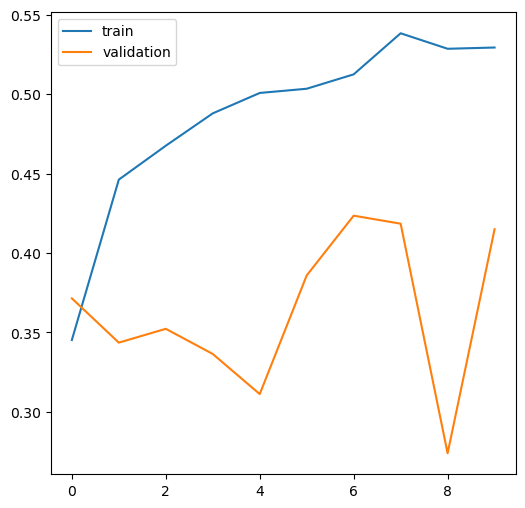

In [19]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)